# Project description

Interconnect's telecommunications operator would like to forecast its customer cancellation rate. If it is discovered that a user or user plans to leave, promotional codes and special plans options will be offered. The Interconnect Marketing team has compiled some of its customer's personal data, including information about their plans and contracts.

### Interconnect Services

Interconnect mainly provides two types of services:
1. Communication by landline. The phone can be connected to several lines simultaneously.
2. Internet. The network can be configured through a telephone line (DSL, *digital subscriber *) or through an optical fiber cable.

Some other services offered by the company include:

-Internet security: Antivirus software (*Dispositive protection*) and a malicious website blocker (*safety clan*).
-A technical support line (*Support Technician*).
-File storage in the cloud and backup data (*backuponline*).
-TV streaming (*streamingtv*) and films directory (*streaming of*)

The clientele can choose between a monthly payment or sign a contract of 1 or 2 years. You can use several payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

-`contract.csv` -Contract information;
-`Personal.CSV` -customer personal data;
-`Internet.CSV` -Information on Internet services;
-`Phone.CSV` -Information about telephone services.

In each file, the Customerid` (Customer ID) column contains a unique code assigned to each client. The contract information is valid from February 1, 2020.

### Criteria to consider

Objective characteristic: the `'enddate'` column is equal to`' no'`.

Main metric: AUC-ROC.
Additional metric: ExactD.

Evaluación's Cristarios:

-AUC-ROC <0.75-0 SP
-0.75 ≤ AUC-ROC <0.81-4 SP
-0.81 ≤ AUC-ROC <0.85-4.5 SP
-0.85 ≤ AUC-ROC <0.87-5 SP
-0.87 ≤ AUC-ROC <0.88-5.5 SP
-AUC-ROC ≥ 0.88-6 SP

## Work plan for the interconnect customer cancellation prediction project

### 1. Data initial collection and exploration (EDA)

***Data load **: Load the CSV files (`contract. and pandas).
***Initial inspection **:*
    *Visualize the first and last rows of each dataframe (`df.head ()`, `df.tail ()`).
*Obtain information on the number of rows and columns, and data types (`df.info ()`).
    *Identify missing values ​​(`df.isnull (). Sum ()`) and decide how to treat them (imputation or elimination).
***Data Union **: Unite the dataraframes in one using `customerid` as key (` pd.merge () `).
***Exploratory analysis **:*
    ***OBJECTIVE VARIABLE **: Create "Churn" based on `enddate` (0: inactive user, 1: active user).
***"Churn" distribution **: Analyze the balance of classes.
    ***Bivariate analysis **: Analyze the relationship between each variable and "churn".
    ***Visualizations **: Histograms, bar graphs, dispersion diagrams, etc.

### 2. Data preprocessing

***Characteristics Engineering **:*
    *Create new variables (duration of the contract in months, number of services, etc.).
    *Consider interactions between variables (Internet type and contract type).
***Data transformation **:*
    *; Learning
***DISBALANCE MANAGEMENT **:*
*Given the imbalance identified in the target variable, overmone techniques (such as Smote or Randomoversampler) will be applied to generate new minority class samples ("yes") and balance the training set.

### 3. Modeling and evaluation
***Selection of models **: Consider several classification models that are suitable for the cancellation prediction problem, such as logistics regression, decision trees, Random Forest, Gradient Boosting (XGBoost, Lightgbm), neural networks, etc.
***Data Division **: Divide the data set into three parts:*
    *  Training.
    *Validation.
    *  Proof.
***Training and adjustment **: Train the models selected in the training set and adjust their hyperparameters using techniques such as cross validation and grid search (Gridsearchcv).
***Evaluation metrics **:*
    ***AUC-ROC **: It will be used as the main metric to evaluate the performance of the models, since it is a robust metric for classification problems with classes.
***Accuracy (ACCURACY) **: The accuracy of the training set will be evaluated versus the test to detect on adjustment.
    ***F1-SCORE **: This metric is useful for evaluating the balance between precision and recall, especially in problems with classes.
***Model selection **: Select the model that obtains the best performance in the validation set, considering both the AUC-ROC and the accuracy and the F1-Score.

## Import libreries

In [572]:
import math
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import torch
import transformers
import logging
import re
from tqdm.auto import tqdm
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import random
import nltk
from sklearn.metrics import roc_curve, auc
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
import statistics
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense, Dropout, Input, ELU, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings
from sklearn.exceptions import ConvergenceWarning 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import TimeSeriesSplit
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import GridSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

## Load Data

In [573]:
# Read the CSV data into a Pandas DataFrame

contract = pd.read_csv('final_provider/contract.csv')
personal = pd.read_csv('final_provider/personal.csv')
internet = pd.read_csv('final_provider/internet.csv')
phone = pd.read_csv('final_provider/phone.csv')

## Analyze and correct Data

### For Contract

In [574]:
#Show the first 5 rows of the DataFrame
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [575]:
#Analyze general information for Contrat DataFrame
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


We will need to perform some corrections to the data, like changing the data type of the date columns and the total charges. No null values shown.

In [576]:
#Correct data types
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'],format='%Y-%m-%d')

# Try converting EndDate to datetime format (handle potential errors)
try:
    contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d %H:%M:%S')
except:
    pass  # Do nothing if conversion fails (likely due to no End Dates)

#Convert TotalCharges to numeric

contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Display information about the DataFrame 'contract'
contract.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [577]:
#generate descriptive statistics for the numerical columns in the DataFrame 
contract.describe()

,BeginDate,MonthlyCharges,TotalCharges
count,7043,7043.000000,7032.000000
mean,2017-04-30 13:01:50.918642688,64.761692,2283.300441
min,2013-10-01 00:00:00,18.250000,18.800000
25%,2015-06-01 00:00:00,35.500000,401.450000
50%,2017-09-01 00:00:00,70.350000,1397.475000
75%,2019-04-01 00:00:00,89.850000,3794.737500
max,2020-02-01 00:00:00,118.750000,8684.800000
std,NaN,30.090047,2266.771362


In [578]:
def assign_charges(row):
    start_year = row['BeginDate'].year
    #If enddate is 'no', assign the position until the current year
    if row['EndDate'] != 'No':
        end_date = pd.to_datetime(row['EndDate'], errors='coerce')  #Convise Datetime
        end_year = end_date.year if pd.notna(end_date) else pd.Timestamp.today().year
    else:
        end_year = pd.Timestamp.today().year 
    
    total_charges = row['TotalCharges']
    years = range(start_year, end_year + 1)
    
    #Calculate the annual position depending on the type
    if row['Type'] == 'month-month':
        annual_charge = total_charges * 12
    else:
        annual_charge = total_charges
    
    #Create a dataframe over the years as index and total charts as a column
    df = pd.DataFrame(annual_charge, index=years, columns=['TotalCharges'])
    
    
    return df

#Apply the function to each row and concatenate the results
contract_expanded = contract.apply(assign_charges, axis=1)

#Concatenar Los Dataframes resulting
contract_expanded = pd.concat(contract_expanded.to_list())

#Reset the index and rename the columns
contract_expanded = contract_expanded.reset_index()
contract_expanded.columns = ['year', 'TotalCharges']

    
#Group for 'Year' and add the values ​​of 'Total Charges'
contract_expanded_grouped = contract_expanded.groupby('year')['TotalCharges'].sum().reset_index()

contract_expanded_grouped

,year,TotalCharges
0,2013,57107.05
1,2014,7058583.95
2,2015,10390349.70
3,2016,12586916.50
4,2017,14296341.25
5,2018,15460304.10
6,2019,16047335.90
7,2020,13877563.15
8,2021,13193241.80
9,2022,13193241.80


<Figure size 1000x600 with 0 Axes>

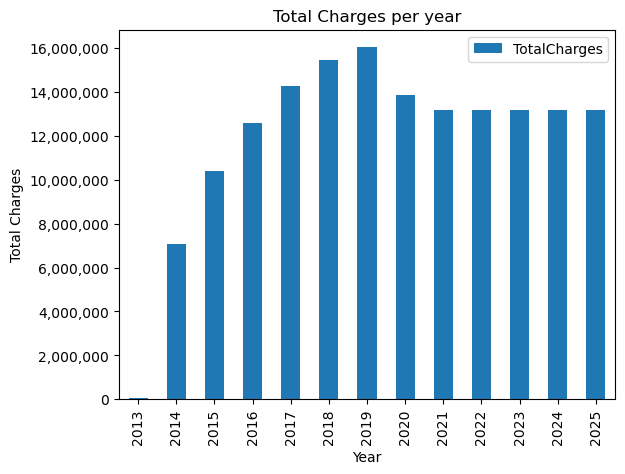

In [579]:
#Create the bar chart
plt.figure(figsize=(10, 6))
contract_expanded_grouped.plot(kind='bar',x='year', y='TotalCharges')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Year')
plt.ylabel('Total Charges')
plt.title('Total Charges per year')
plt.show()

Text(0.5, 1.0, 'Histogram for Total Charges')

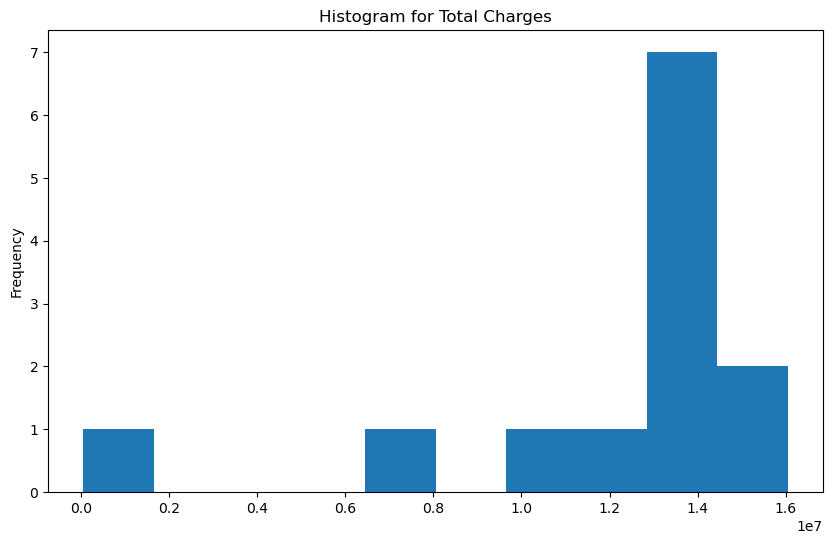

In [580]:
#Create a histogram
plt.figure(figsize=(10, 6))
contract_expanded_grouped['TotalCharges'].plot(kind='hist')
plt.title('Histogram for Total Charges')

### For personal

In [581]:
#Show the first 5 rows of the DataFrame
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [582]:
#Analyze general information for Contrat DataFrame
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


There is no need to modiy the data

### For internet

In [583]:
#Show the first 5 rows of the DataFrame
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [584]:
#Analyze general information for Internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [585]:
#generate descriptive statistics for the numerical columns in the DataFrame 
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


There is no need to modiy the data

### For phone

In [586]:
#Show the first 5 rows of the DataFrame
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [587]:
#Analyze general information for Phone DataFrame
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [588]:
#generate descriptive statistics for the numerical columns in the DataFrame 
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


There is no need to modiy the data

## Unify Datasets

In [589]:
#Unify the 3 Datasets with 'merge'
df = contract.merge(personal, on= 'customerID')
df = df.merge(internet, on = 'customerID')
df = df.merge(phone,on = 'customerID')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes


In [590]:
#Check new DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4835 non-null   object        
 1   BeginDate         4835 non-null   datetime64[ns]
 2   EndDate           4835 non-null   object        
 3   Type              4835 non-null   object        
 4   PaperlessBilling  4835 non-null   object        
 5   PaymentMethod     4835 non-null   object        
 6   MonthlyCharges    4835 non-null   float64       
 7   TotalCharges      4832 non-null   float64       
 8   gender            4835 non-null   object        
 9   SeniorCitizen     4835 non-null   int64         
 10  Partner           4835 non-null   object        
 11  Dependents        4835 non-null   object        
 12  InternetService   4835 non-null   object        
 13  OnlineSecurity    4835 non-null   object        
 14  OnlineBackup      4835 n

In [591]:
#Check for Nulls
df.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [592]:
#Replace Nulls in TotalCharges field with mean
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [593]:
def Contract_duration(row):
    """
    Calculate the anual charges and define if the user is active or not.

    Args:
        row: A pandas Series representing a single row of the DataFrame.

    Returns:
        A pandas Series representing a single row of the DataFrame
    """

    start_date = pd.to_datetime(row['BeginDate'])
    start = start_date.to_julian_date() 

    if row['EndDate'] != 'No':
        row['Active'] = 'No'
    else:
        row['Active'] = 'Yes'
    
    # Calculate annual charge based on contract type
    if row['Type'] == 'Month-to-month':
        row['annual_charge'] = row['TotalCharges'] * 12
    elif row['Type'] == 'Two years':
        row['annual_charge'] = row['TotalCharges'] / 2
    else: 
        row['annual_charge'] = row['TotalCharges']  # Assuming 'One year' for other cases

    return row

In [594]:
def calculate_duration(row):
    if row['EndDate'] == "No":
        return None
    else: 
        end_date = pd.to_datetime(row['EndDate'])
        begin_date = pd.to_datetime(row['BeginDate'])
        return (end_date-begin_date).days // 30
    
df['duration_months'] = df.apply(calculate_duration, axis=1)

In [595]:
#Replace the 'Month-to-month' Type to 'Monthly' to shorten the word and have better visibility
df.loc[df['Type'].isin(['Month-to-month']), 'Type'] = 'Monthly' 

In [596]:
#Apply the function to calculate the Anual charge and determin if the user is active or not.
df = df.apply(Contract_duration, axis=1)
#Show the first rows
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration_months,Active,annual_charge
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,Yes,No,Yes,No,No,No,No,NaN,Yes,1889.50
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Monthly,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,2.0,No,108.15
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Monthly,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,2.0,No,151.65
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Monthly,Yes,Electronic check,99.65,820.50,Female,0,...,No,No,Yes,No,Yes,Yes,Yes,8.0,No,820.50
4,1452-KIOVK,2018-04-01,No,Monthly,Yes,Credit card (automatic),89.10,1949.40,Male,0,...,No,Yes,No,No,Yes,No,Yes,NaN,Yes,1949.40


In [597]:
#Make a copy of the df in a new variable
df_unified = df

### Overview of the relation between data

In [598]:
#Create a dictionary for payment type
Payment_dict = {'Mailed check':1, 'Electronic check':2, 'Credit card (automatic)':3,
       'Bank transfer (automatic)':4}
df['PaymentMethod'] = df['PaymentMethod'].map(Payment_dict)

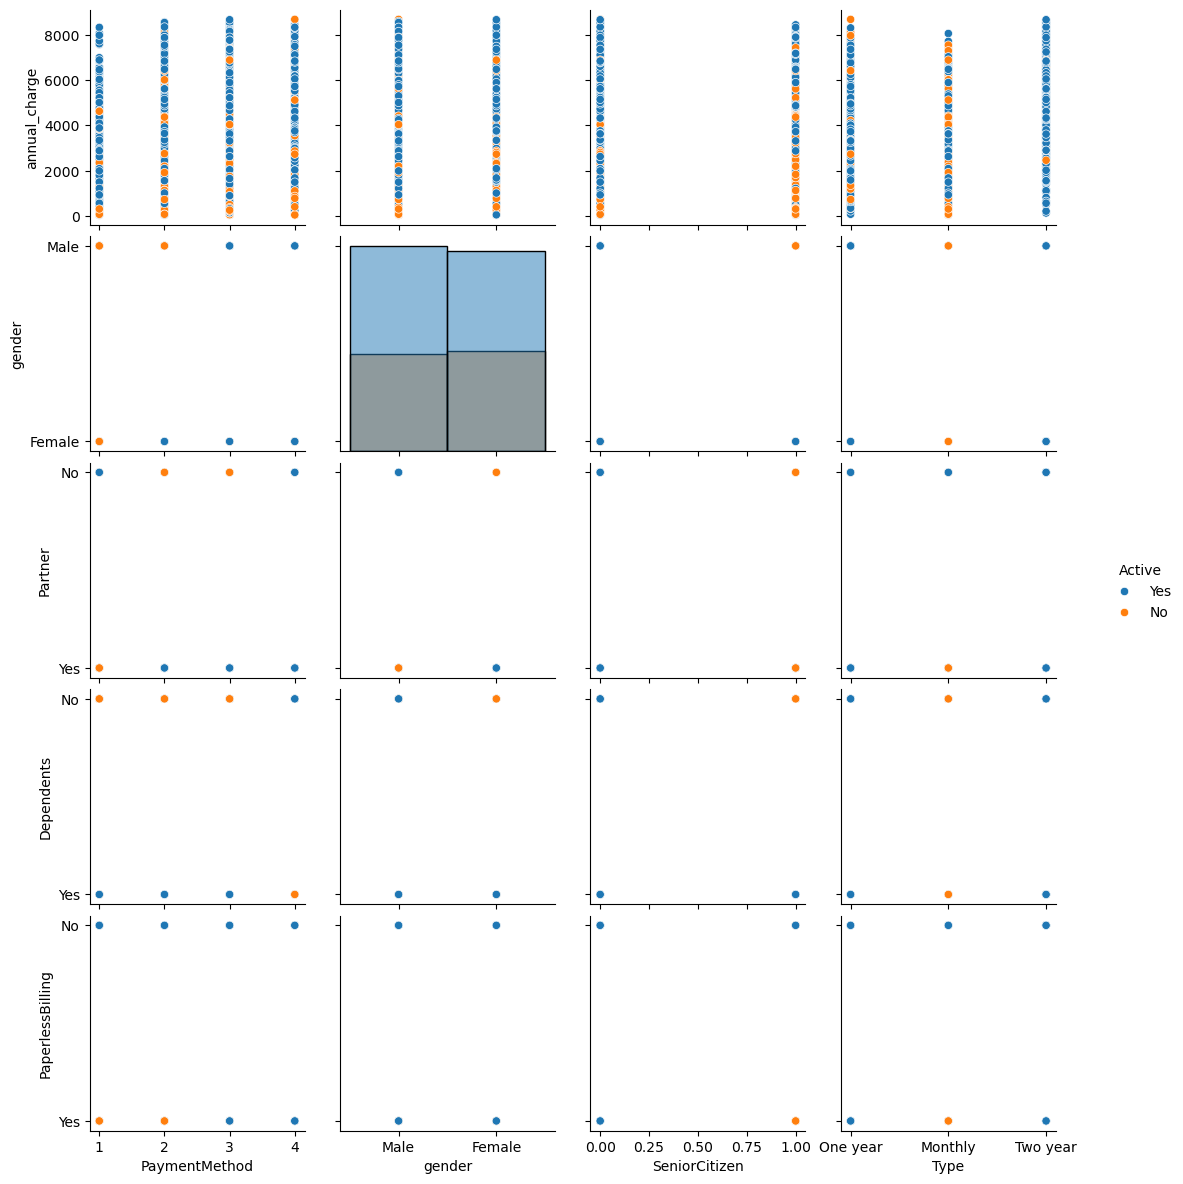

In [599]:
# Create a pairplot using seaborn
g = sns.pairplot(df, hue= 'Active', diag_kind="hist", x_vars=['PaymentMethod', 'gender', 'SeniorCitizen','Type'], y_vars=['annual_charge','gender','Partner', 'Dependents', 'PaperlessBilling']) 

# Set the figure size of the pairplot
g.fig.set_size_inches(12, 12)

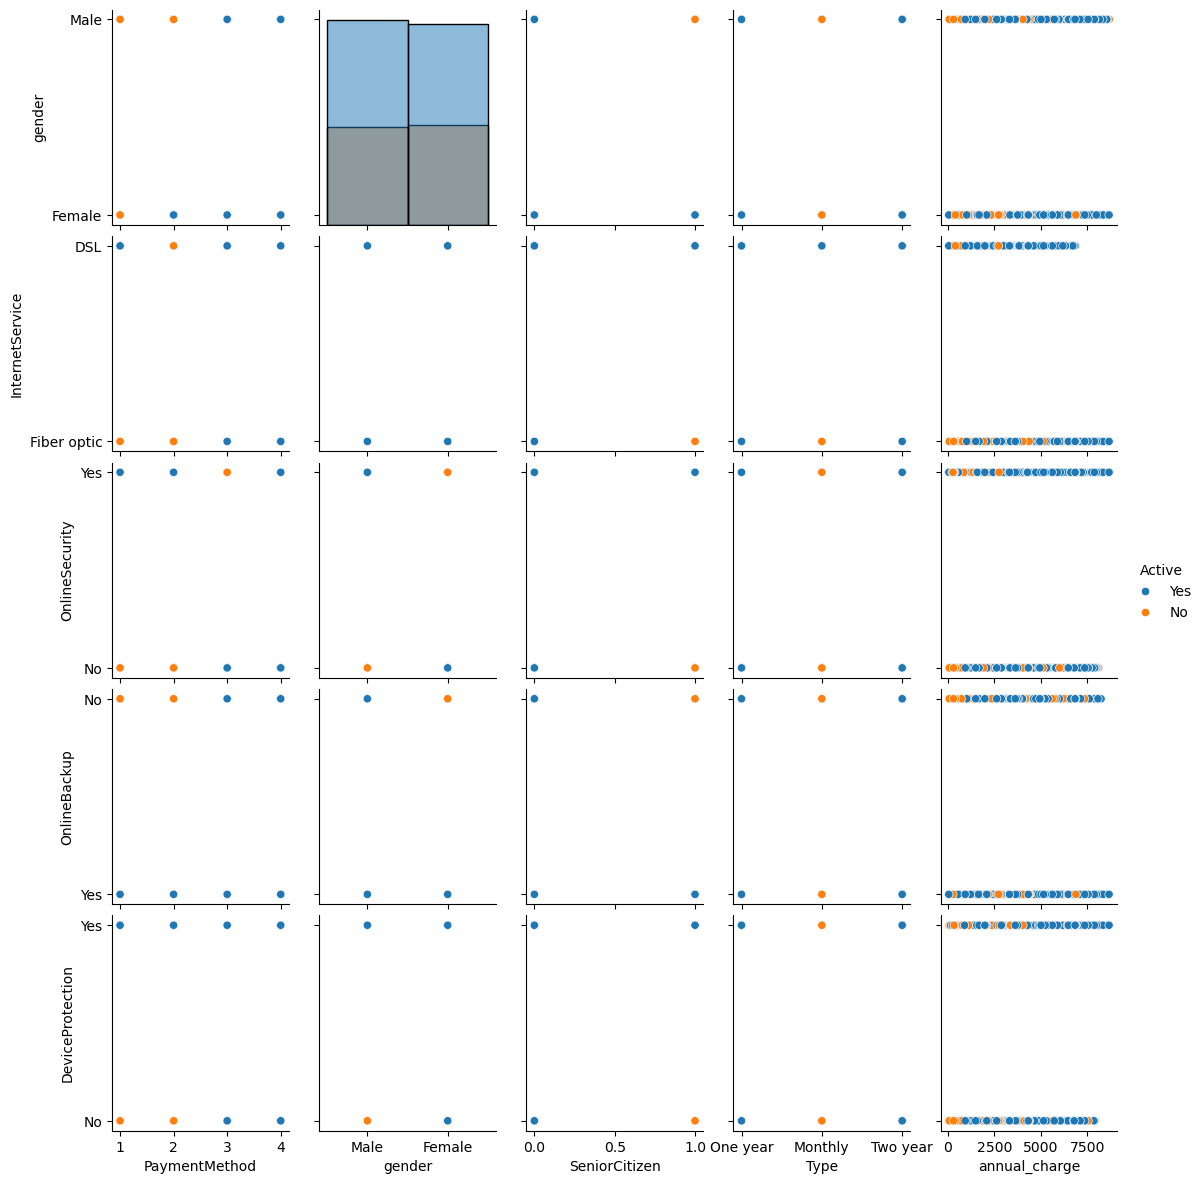

In [600]:
# Create a pairplot using seaborn
h = sns.pairplot(df, hue= 'Active', diag_kind="hist", x_vars=['PaymentMethod', 'gender', 'SeniorCitizen','Type','annual_charge'], y_vars=['gender','InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',]) 

# Set the figure size of the pairplot
h.fig.set_size_inches(12, 12)

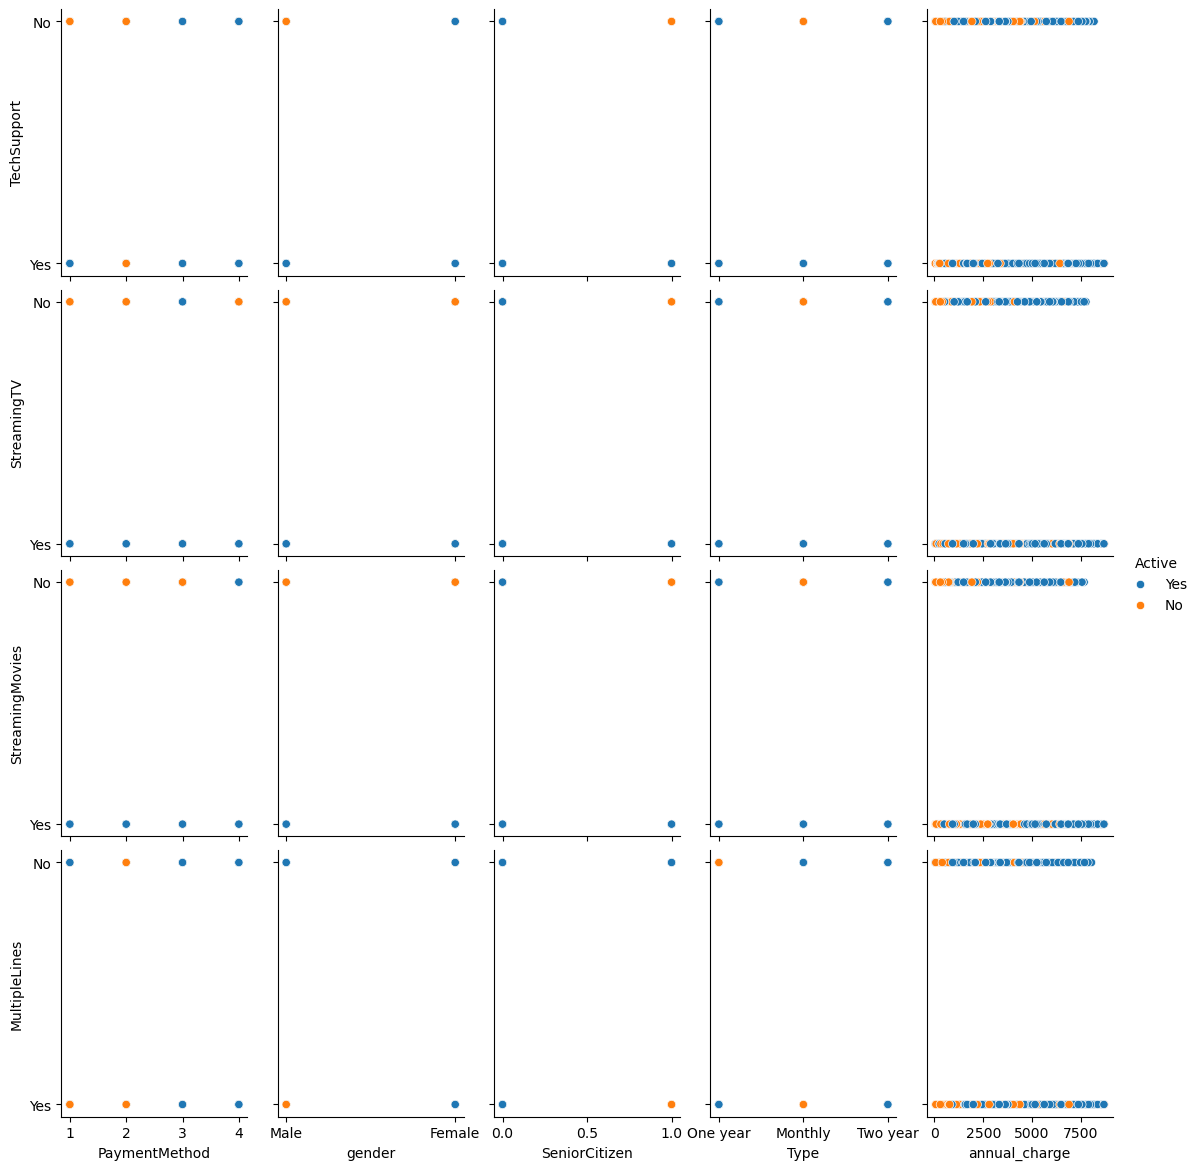

In [601]:
# Create a pairplot using seaborn
i = sns.pairplot(df, hue= 'Active', diag_kind="hist", x_vars=['PaymentMethod', 'gender', 'SeniorCitizen','Type','annual_charge'], y_vars=['TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines',]) 

# Set the figure size of the pairplot
i.fig.set_size_inches(12, 12)

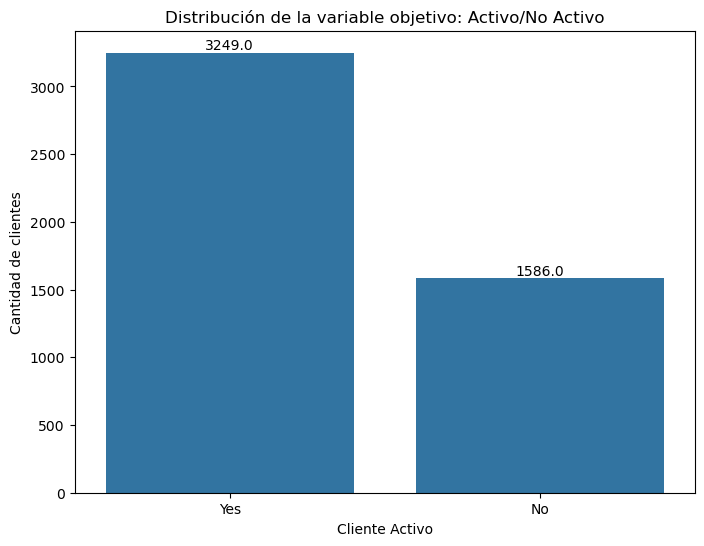

In [602]:
#Count observations by class
balance_de_clases = df['Active'].value_counts()

#Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Active', data=df) 
plt.title('Distribución de la variable objetivo: Activo/No Activo')
plt.xlabel('Cliente Activo')
plt.ylabel('Cantidad de clientes')

#Add data labels to each bar
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

We can conclude that there is an imbalance in the 50%classes, so it will be necessary to apply balance methods to training data

## Prepare data

In [603]:
activos = df[df['Active']==1]
inactivo = df[df['Active']==0]

In [604]:
# Aplicar sobremuestro para balancear las clases 
sobremuestreo = df.sample(n=290,replace=True,random_state=0)
sobremuestreo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 2732 to 945
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        290 non-null    object        
 1   BeginDate         290 non-null    datetime64[ns]
 2   EndDate           290 non-null    object        
 3   Type              290 non-null    object        
 4   PaperlessBilling  290 non-null    object        
 5   PaymentMethod     290 non-null    int64         
 6   MonthlyCharges    290 non-null    float64       
 7   TotalCharges      290 non-null    float64       
 8   gender            290 non-null    object        
 9   SeniorCitizen     290 non-null    int64         
 10  Partner           290 non-null    object        
 11  Dependents        290 non-null    object        
 12  InternetService   290 non-null    object        
 13  OnlineSecurity    290 non-null    object        
 14  OnlineBackup      290 non-nu

In [605]:
# use Dummies to convert the data into a format that is accepted by the models
Type_oh = pd.get_dummies(df['Type']) 
gender_oh = pd.get_dummies(df['gender']) 
InternetService_oh = pd.get_dummies(df['InternetService'])

In [606]:
# Add the Dumies to the DataFrame
df = pd.concat([df,Type_oh,gender_oh,InternetService_oh],axis=1)

In [607]:
#Replace all the Yes with No
df = df.replace({'Yes': 1, 'No': 0})

In [608]:

for col in df.columns:
    if df[col].dtypes == 'bool':
        df[col] = df[col].astype(int)
    else:
        df[col] 

In [609]:
# Get rid of all the columns that are not accepted by the models or are irrelevant 
df = df.drop(['Type','gender','InternetService','EndDate','BeginDate','MonthlyCharges','TotalCharges'],axis=1)

In [610]:
#Set the index of the Dataframe since the customerID column is not accepted by some models ans still we dont want to lose the information
df = df.set_index('customerID')
df.head()

,PaperlessBilling,PaymentMethod,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,duration_months,Active,annual_charge,Monthly,One year,Two year,Female,Male,DSL,Fiber optic
customerID,,,,,,,,,,,,,,,,,,,,,
5575-GNVDE,0,1,0,0,0,1,0,1,0,0,...,NaN,1,1889.50,0,1,0,0,1,1,0
3668-QPYBK,1,1,0,0,0,1,1,0,0,0,...,2.0,0,108.15,1,0,0,0,1,1,0
9237-HQITU,1,2,0,0,0,0,0,0,0,0,...,2.0,0,151.65,1,0,0,1,0,0,1
9305-CDSKC,1,2,0,0,0,0,0,1,0,1,...,8.0,0,820.50,1,0,0,1,0,0,1
1452-KIOVK,1,3,0,0,1,0,1,0,0,1,...,NaN,1,1949.40,1,0,0,0,1,0,1


## Class balancing

In [611]:
df_to_predict = df.copy()

In [612]:
df = df.dropna()

In [613]:
#Define the features and target
X = df.drop(columns=['Active','duration_months'], axis=1)
y = df['duration_months'].to_frame()

In [614]:
#Balance clases using RandomOverSampler
#ros = RandomOverSampler(random_state=0)  #Random_state for reproducibility
#X_resampled, y_resampled = ros.fit_resample(X, y) #Create a new data set where the minority class has the same number of samples as the majority class.
#It does it randomly duplicating existing instances of the minority class.

In [615]:
#Check the differences (After,Before)
#print('Distribución de clases antes del sobremuestreo:', Counter(y))
#print('Distribución de clases después del sobremuestreo:', Counter(y_resampled))

In [616]:
def split_data(features_x,target_y):
    """
    Splits the input features and target into training, validation, and test sets.

    Args:
        features_x: The feature matrix (NumPy array or Pandas DataFrame).
        target_y: The target vector (NumPy array or Pandas Series).

    Returns:
        A tuple containing the features and target for the temporary, validation, and test sets, respectively.
    """

    features = features_x
    target = target_y

    # Split data into training and temporary sets
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.2, random_state=12345
    )

    return features_train, features_test, target_train, target_test

In [617]:

# Suprimir los warnings de tipo FutureWarning y ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

## LinearRegression Model

In [618]:
#Returns partitions.
features_train, features_test, target_train, target_test = split_data(X,y)

linear_regression = LinearRegression()
linear_regression.fit(features_train,target_train)

#Predicts with the best model
train_pred_LR = linear_regression.predict(features_train)
test_pred_LR = linear_regression.predict(features_test)

#Calculate metrics
rmse_train_LR = np.sqrt(mean_squared_error(target_train, train_pred_LR)** 0.5)
rmse_test_LR = np.sqrt(mean_squared_error(target_test, test_pred_LR)** 0.5)


In [619]:
print("train RMSE:", rmse_train_LR)
print(" test RMSE:", rmse_test_LR)

train RMSE: 1.8109648046411733
 test RMSE: 1.8147233419657118


## RandomForestRegressor

In [620]:
# Define a parameter grid for the RandomForestRegressor
param_grid_RFR = {
    'n_estimators': [150,200],  # Number of trees in the forest
    'max_depth':[14,15],# #depth of each tree, the less depth, the less overfiting
    'min_samples_split':[2,3], #minimun number of samples needed to split a node
    'max_features':[0.5,0.6], #The number of features considered to divide a node
    'bootstrap':[True] #Allows you to show data with replacement to train each tree, helping to create more diverse models
}

In [621]:
from sklearn.model_selection import RandomizedSearchCV

random_search_RFR = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid_RFR,
    n_iter=200,
    scoring='neg_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=5),
    random_state=12345
)
random_search_RFR.fit(features_train, target_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=200. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(), n_iter=200,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [14, 15],
                                        'max_features': [0.5, 0.6],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [150, 200]},
                   random_state=12345, scoring='neg_mean_squared_error')

In [622]:
#Predicts with the best model
train_pred_RFR = random_search_RFR.predict(features_train)
test_pred_RFR = random_search_RFR.predict(features_test)

#Calculate metrics
rmse_train_RFR = np.sqrt(mean_squared_error(target_train, train_pred_RFR)** 0.5)
rmse_test_RFR = np.sqrt(mean_squared_error(target_test, test_pred_RFR)** 0.5)

In [623]:
print("train RMSE:", rmse_train_RFR)
print("test RMSE:", rmse_test_RFR)

train RMSE: 0.9198375047044575
test RMSE: 1.4150225342174088


## 2 Layer Neural Network Models with GridSearch

In [624]:
def keras_tuner(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('hidden_units', min_value=32, max_value=128, step=32),  # Tune number of neurons
        activation='relu',
        input_dim=features_train.shape[1],
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.002, 0.01]))     # Tune L2 regularization
    ))
    model.add(Dropout(hp.Choice('dropout_rate', values=[0.1,0.2])))   # Randomly deactivates a fraction of neurons during training
    model.add(Dense(
        units=hp.Int('hidden_units_2', min_value=16, max_value=64, step=16),  # Second dense layer
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_reg', values=[0.01, 0.002]))
    ))
    model.add(Dropout(hp.Choice('dropout_rate_2', values=[0.1,0.2])))
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01])),
        loss='mean_squared_error'
    )
    return model

In [625]:

# Set up GridSearch tuner
tuner = GridSearch(
    keras_tuner,
    objective="val_loss",  # Minimize validation loss
    max_trials=10,         # Total number of configurations to try
    directory="grid_search_results",  # Where to store results
    project_name="grid_search"
)

Reloading Tuner from grid_search_results/grid_search/tuner0.json


In [626]:
tuner.search(
    features_train,
    target_train,
    validation_data=(features_test, target_test),
    epochs=50,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)]
)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Best Hyperparameters: {'hidden_units': 32, 'l2_reg': 0.002, 'dropout_rate': 0.1, 'hidden_units_2': 32, 'dropout_rate_2': 0.2, 'learning_rate': 0.01}


In [627]:
# Build and train the model with the best hyperparameters
best_model_mpl = tuner.hypermodel.build(best_hps)
best_model_mpl.fit(
    features_train, target_train,
    validation_data=(features_test, target_test),
    epochs=60,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the best model
train_predictions_mpl = best_model_mpl.predict(features_train)
test_predictions_mpl = best_model_mpl.predict(features_test)
rmse_train_mpl = np.sqrt(mean_squared_error(target_train, train_predictions_mpl)** 0.5)
rmse_test_mpl = np.sqrt(mean_squared_error(target_test, test_predictions_mpl)** 0.5)

Epoch 1/60


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14203.5000 - val_loss: 1096.1736
Epoch 2/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 473.1448 - val_loss: 89.3667
Epoch 3/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.2883 - val_loss: 50.7033
Epoch 4/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140.0262 - val_loss: 27.2600
Epoch 5/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.1873 - val_loss: 27.8224
Epoch 6/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.1819 - val_loss: 41.1823
Epoch 7/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.2505 - val_loss: 33.9518
Epoch 8/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.0954 - val_loss: 31.6961
Epoch 9/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.9096 - val_loss: 50.2536
Epoch 10/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.2811 - val_loss: 43.1057
Epoch 11/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.2616 - val_loss: 40.5785
Epoch 12/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [628]:
print("train RMSE:", rmse_train_mpl)
print("test RMSE:", rmse_test_mpl)

train RMSE: 2.4657250812587383
test RMSE: 2.465190915282993


## Predictions

In [629]:
#Create a dataframe with just the Active users
just_actives = df_to_predict[df_to_predict['Active']==1]

In [630]:
#Make predictions with the active users only
features = just_actives.drop(columns=['Active','duration_months'],axis=1)
just_actives['predicted'] = random_search_RFR.predict(features)
just_actives

/var/folders/zz/1lh114c55jj9tjb2vztk4z340000gq/T/ipykernel_4453/3773221648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_actives['predicted'] = random_search_RFR.predict(features)


,PaperlessBilling,PaymentMethod,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Active,annual_charge,Monthly,One year,Two year,Female,Male,DSL,Fiber optic,predicted
customerID,,,,,,,,,,,,,,,,,,,,,
5575-GNVDE,0,1,0,0,0,1,0,1,0,0,...,1,1889.50,0,1,0,0,1,1,0,24.653206
1452-KIOVK,1,3,0,0,1,0,1,0,0,1,...,1,1949.40,1,0,0,0,1,0,1,22.792222
6388-TABGU,0,4,0,0,1,1,1,0,0,0,...,1,3487.95,0,1,0,0,1,1,0,50.161968
9763-GRSKD,1,1,0,1,1,1,0,0,0,0,...,1,587.45,1,0,0,0,1,1,0,9.897778
8091-TTVAX,0,3,0,1,0,0,0,1,0,1,...,1,5681.10,0,1,0,0,1,0,1,56.346444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9767-FFLEM,1,3,0,0,0,0,0,0,0,0,...,1,2625.25,1,0,0,0,1,0,1,34.454778
8456-QDAVC,1,4,0,0,0,0,0,0,0,1,...,1,1495.10,1,0,0,0,1,0,1,17.562778
6840-RESVB,1,1,0,1,1,1,0,1,1,1,...,1,1990.50,0,1,0,0,1,1,0,22.909079


In [631]:
df_unified['duration_months'] = df_unified['duration_months'].fillna('still active')

In [632]:
#DataFrame with the predictions
df_unified = df_unified.reset_index()
final_df =just_actives.reset_index()
final_df = final_df[['customerID','Active','predicted']]
final_df = df_unified.merge(final_df, on= 'customerID',how='left')

In [633]:
final_df['predicted'] = final_df['predicted'].fillna('still active')

In [634]:
final_df = final_df.drop(columns=['Active_y'])

In [635]:
final_df.rename(columns={'Active_x':'Active'},inplace=True)

In [644]:
#Create a dictionary to reverse payment type
Payment_dict_reverse = {1:'Mailed check', 2:'Electronic check', 3:'Credit card (automatic)',
       4:'Bank transfer (automatic)'}
final_df['PaymentMethod'] = final_df['PaymentMethod'].map(Payment_dict_reverse)

In [638]:
last_date = pd.to_datetime('01-02-2020')

In [642]:
from dateutil.relativedelta import relativedelta
# Handle values ​​in the 'predicted' column
def calcular_fecha_predicted(x):
    try:
        # Try to convert number and add months
        meses = int(float(x))  # Convierte valores como '1.00' a entero
        return last_date + relativedelta(months=meses)
    except (ValueError, TypeError):  
        return pd.NaT  # Asignar Nat (not a time) for values ​​in the numericals

# Apply the function to the 'predicted' column
final_df['EndPredictedDate'] = final_df['predicted'].apply(calcular_fecha_predicted)

# Check results
print(final_df[['customerID', 'predicted', 'EndPredictedDate']])

      customerID     predicted EndPredictedDate
0     5575-GNVDE     24.653206       2022-01-02
1     3668-QPYBK  still active              NaT
2     9237-HQITU  still active              NaT
3     9305-CDSKC  still active              NaT
4     1452-KIOVK     22.792222       2021-11-02
...          ...           ...              ...
4830  8456-QDAVC     17.562778       2021-06-02
4831  6840-RESVB     22.909079       2021-11-02
4832  2234-XADUH     67.791032       2025-08-02
4833  8361-LTMKD  still active              NaT
4834  3186-AJIEK     63.686905       2025-04-02

[4835 rows x 3 columns]


In [646]:
final_df.to_csv('complete_dataframe.csv',index=True)

## Conclusions of the Interconnect Customer Contract Duration Prediction Project
The main objective of this project was to develop a Machine Learning model capable of predicting the total contract duration (in months) for active Interconnect customers. This prediction would enable the company to proactively identify clients likely to end their contracts soon, allowing the marketing team to implement targeted strategies to extend customer retention.

## Results
After an exhaustive exploratory analysis of the data and a rigorous preprocessing process, several regression models were evaluated to identify the best-performing model based on the established evaluation criteria. The evaluated models were:

### Linear Regression:

Train RMSE: 1.81

Test RMSE: 1.81

### RandomForestRegressor:

Train RMSE: 0.92

Test RMSE: 1.42

### 2 Layer Neural Network Models with GridSearch:

Train RMSE: 2.47

Test RMSE: 2.47

The RandomForestRegressor model was selected for predictions due to its balance between performance and generalization. Predictions using Random Search for RandomForestRegressor allow us to estimate contract durations accurately for active clients.

A dashboard was created to visually represent the predictions, enabling a clear and interactive understanding of the results. The dashboard includes key insights, such as the distribution of predicted contract durations and the identification of customers at risk of early termination.

## Conclusions
A Machine Learning model has been developed capable of predicting the total duration of a customer's contract with good precision, improving customer profiling and retention strategies.

The RandomForestRegressor model demonstrated superior performance in predictive capability (lowest test RMSE: 1.42), making it the most suitable model for deployment.

Predictions suggest that proactive measures can be taken for customers with shorter predicted contract durations, increasing the likelihood of retention through targeted marketing strategies.

The dashboard provides a powerful tool for monitoring and analyzing predictions, making it easier for stakeholders to act on insights effectively.

## Recommendations
Interconnect's marketing team should use this model and the dashboard to identify customers whose contract durations are predicted to be short, implementing timely retention strategies such as promotional offers and personalized service plans.

Continuous monitoring of the model's performance is essential, with periodic updates using new customer data to ensure its precision and efficiency over time.

Expanding the feature set to include additional variables, such as demographic data or service usage information, could further improve predictive capacity and enable more nuanced insights.